## Soft-Margin Linear SVM on Breast Cancer Dataset using Hinge Loss and Gradient Descent

### Importing Libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Loading and Preparing the Breast Cancer Dataset

In [42]:
data = load_breast_cancer()
X = data.data
y = data.target

# Convert labels: 0 → -1 (malignant), 1 → +1 (benign)
y = np.where(y == 0, -1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### SVM Model with Hinge Loss

In [43]:
def compute_hinge_loss(w, X, y, reg_param):
    margins = 1 - y * X.dot(w)
    loss = np.maximum(0, margins)
    return np.mean(loss) + 0.5 * reg_param * np.sum(w ** 2)

### Gradient Definiton

In [44]:
def compute_hinge_gradient(w, X, y, reg_param):
    num_samples = X.shape[0]
    
    scores = X.dot(w)
    margins = 1 - y * scores
    
    active = (margins > 0).astype(float)
    weighted_samples = (active * y).reshape(-1, 1) * X
    data_grad = -np.sum(weighted_samples, axis=0) / num_samples
    
    reg_grad = reg_param * w
    total_grad = data_grad + reg_grad
    
    return total_grad

### Gradient Descent Optimizer

In [45]:
def svm_gradient_descent(X, y, learning_rate, reg_param, num_epochs):
    w = np.zeros(X.shape[1])
    losses = []

    for _ in range(num_epochs):
        loss = compute_hinge_loss(w, X, y, reg_param)
        grad = compute_hinge_gradient(w, X, y, reg_param)
        w -= learning_rate * grad
        losses.append(loss)

    return w, losses

### Training SVM

In [46]:
learning_rate = 0.01
reg_param = 0.1
num_epochs = 1000

weights, losses = svm_gradient_descent(X_train, y_train, learning_rate, reg_param, num_epochs)

### Training Set Performance Metrics

In [52]:
y_train_pred = np.sign(X_train.dot(weights))

train_accuracy = np.mean(y_train_pred == y_train)
train_loss = compute_hinge_loss(weights, X_train, y_train, reg_param)
train_margin = 1 / np.linalg.norm(weights)
train_misclassified = np.sum(y_train_pred != y_train)

print(f"Accuracy        : {train_accuracy * 100:.2f}%")
print(f"Hinge Loss      : {train_loss:.4f}")
print(f"Margin          : {train_margin:.4f}")
print(f"Misclassified   : {train_misclassified} out of {len(y_train)}")

Accuracy        : 98.02%
Hinge Loss      : 0.1426
Margin          : 1.0706
Misclassified   : 9 out of 455


### Predications on Test Data

In [53]:
y_test_pred = np.sign(X_test.dot(weights))

### Test Set Performance Metrics

In [54]:
test_accuracy = np.mean(y_test_pred == y_test)
test_loss = compute_hinge_loss(weights, X_test, y_test, reg_param)
test_margin = 1 / np.linalg.norm(weights)
test_misclassified = np.sum(y_test_pred != y_test)

print(f"Accuracy        : {test_accuracy * 100:.2f}%")
print(f"Hinge Loss      : {test_loss:.4f}")
print(f"Margin          : {test_margin:.4f}")
print(f"Misclassified   : {test_misclassified} out of {len(y_test)}")

Accuracy        : 97.37%
Hinge Loss      : 0.1279
Margin          : 1.0706
Misclassified   : 3 out of 114


### Loss over Epochs

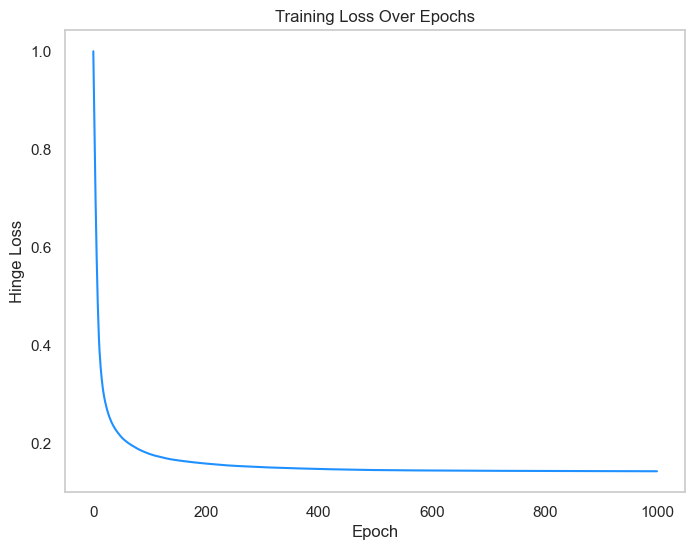

In [61]:
plt.figure(figsize=(8 , 6))
plt.plot(losses, color='dodgerblue')
plt.xlabel('Epoch')
plt.ylabel('Hinge Loss')
plt.title('Training Loss Over Epochs')
plt.grid(False)
plt.show()